**Author:** Sai krishna Kadari

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
sc=StandardScaler()
le=LabelEncoder()

In [3]:
data=pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.shape,data.size

((9994, 13), 129922)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 702.8+ KB


In [6]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [8]:
corr=data.corr()
corr

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


## Univariate Analysis
### 1. Starting with 'Country' Variable.

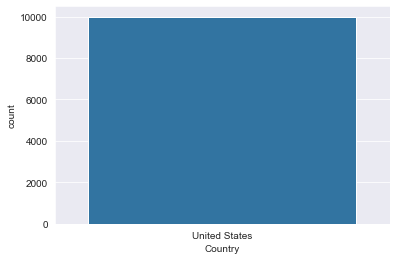

In [9]:
sns.countplot(data['Country'])

In [10]:
data=data.drop(['Country'],axis=1)

In [11]:
data.shape

(9994, 12)

### 2. Ship Mode

In [12]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Ship Mode']=le.fit_transform(data['Ship Mode'])
data['Ship Mode'].value_counts()

3    5968
2    1945
0    1538
1     543
Name: Ship Mode, dtype: int64

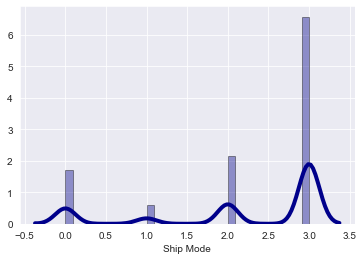

In [14]:
sns.distplot(data['Ship Mode'],hist=True,kde=True,
            bins='auto',color='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':4})

In [15]:
pd.crosstab(data['Ship Mode'],columns='count',normalize=True)

col_0,count
Ship Mode,
0,0.153892
1,0.054333
2,0.194617
3,0.597158


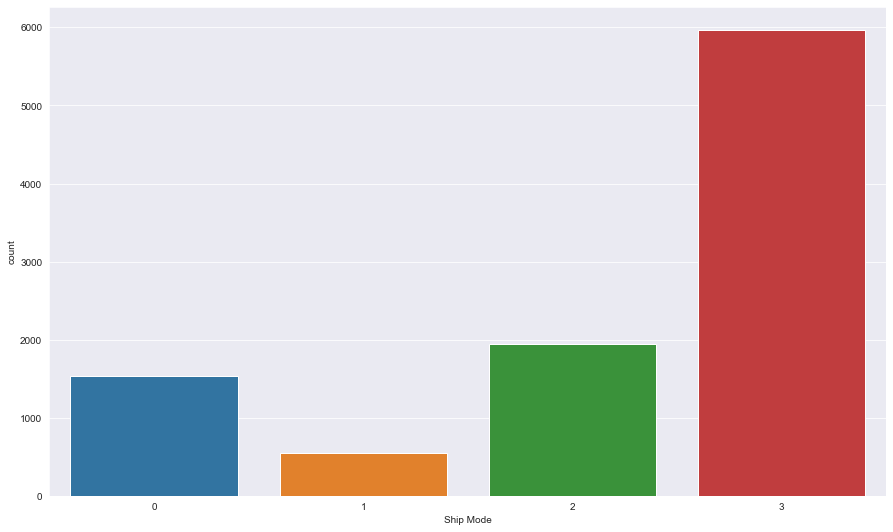

In [16]:
plt.figure(figsize=(15,9))
sns.countplot(data['Ship Mode'])

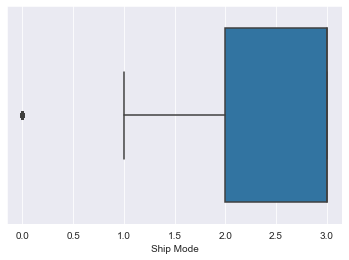

In [17]:
sns.boxplot(data['Ship Mode'])

In [88]:
data['Ship Mode'].describe()

count    9994.000000
mean        2.235041
std         1.100880
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: Ship Mode, dtype: float64

### 3. Segment

In [18]:
data['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [19]:
data['Segment']=le.fit_transform(data['Segment'])
data['Segment'].value_counts()

0    5191
1    3020
2    1783
Name: Segment, dtype: int64

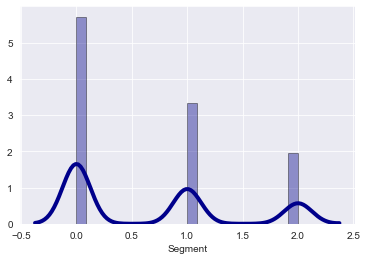

In [20]:
sns.distplot(data['Segment'],hist=True,kde=True,
            bins='auto',color='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':4})

In [21]:
pd.crosstab(data['Segment'],columns='count',normalize=True)

col_0,count
Segment,
0,0.519412
1,0.302181
2,0.178407


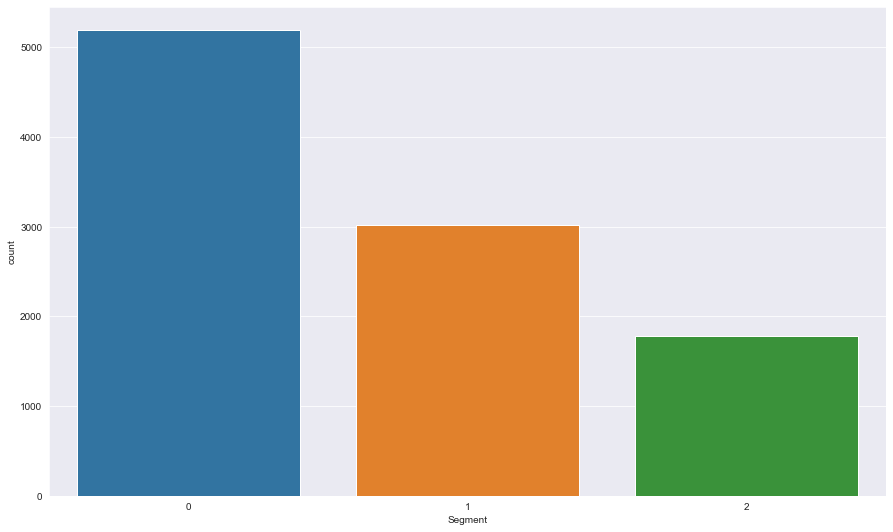

In [22]:
plt.figure(figsize=(15,9))
sns.countplot(data['Segment'])

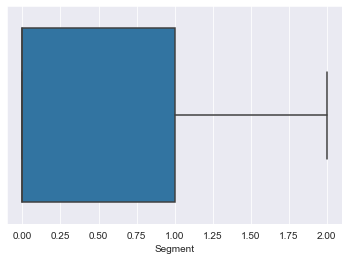

In [23]:
sns.boxplot(data['Segment'])

### 4. City

In [24]:
data['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Littleton          1
Rock Hill          1
Goldsboro          1
Manhattan          1
Layton             1
Name: City, Length: 531, dtype: int64

In [25]:
data['City']=le.fit_transform(data['City'])
data['City'].value_counts()

329    915
266    747
374    537
438    510
452    428
      ... 
309      1
496      1
349      1
1        1
0        1
Name: City, Length: 531, dtype: int64

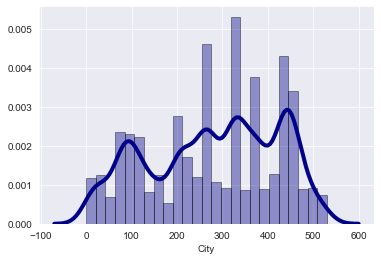

In [26]:
sns.distplot(data['City'],hist=True,kde=True,
            bins='auto',color='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':4})

In [27]:
data['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [28]:
data['State']=le.fit_transform(data['State'])
data['State'].value_counts()

3     2001
30    1128
41     985
36     587
45     506
11     492
33     469
8      383
20     255
31     249
1      224
44     224
9      184
40     183
4      182
12     149
15     139
19     135
28     130
35     124
47     110
18     105
6       96
21      89
5       82
23      66
34      66
0       61
2       60
37      56
22      53
42      53
16      42
38      42
26      39
25      38
29      37
13      30
27      27
14      24
10      21
24      15
39      12
43      11
7       10
17       8
32       7
46       4
48       1
Name: State, dtype: int64

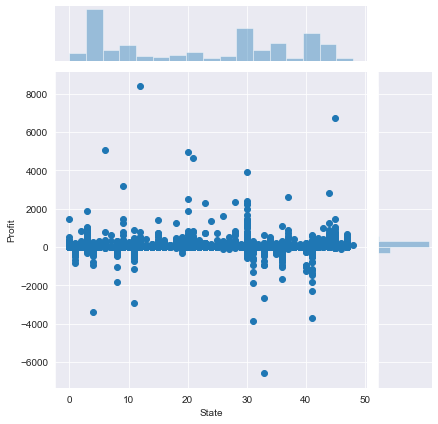

In [29]:
sns.jointplot(x='State',y='Profit',data=data)

In [30]:
pd.crosstab(data['State'],columns='count',normalize=True)

col_0,count
State,
0,0.006104
1,0.022413
2,0.006004
3,0.200220
4,0.018211
5,0.008205
6,0.009606
7,0.001001
8,0.038323


In [31]:
data['Postal Code'].value_counts()

10035    263
10024    230
10009    229
94122    203
10011    193
        ... 
33458      1
95616      1
48307      1
61832      1
59102      1
Name: Postal Code, Length: 631, dtype: int64

In [32]:
data['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [33]:
data['Region']=le.fit_transform(data['Region'])
data['Region'].value_counts()

3    3203
1    2848
0    2323
2    1620
Name: Region, dtype: int64

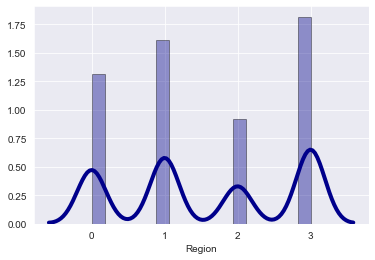

In [34]:
sns.distplot(data['Region'],hist=True,kde=True,
            bins='auto',color='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':4})

In [35]:
pd.crosstab(data['Region'],columns='count',normalize=True)

col_0,count
Region,
0,0.232439
1,0.284971
2,0.162097
3,0.320492


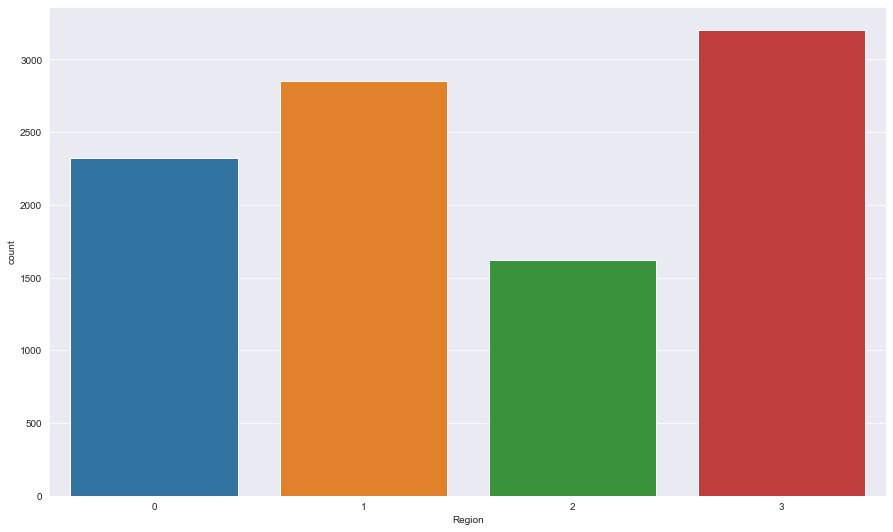

In [36]:
plt.figure(figsize=(15,9))
sns.countplot(data['Region'])

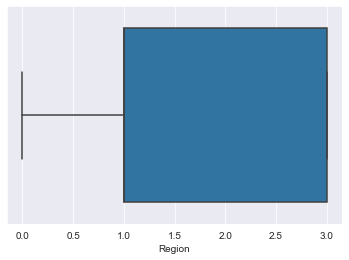

In [37]:
sns.boxplot(data['Region'])

In [38]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [39]:
data['Category']=le.fit_transform(data['Category'])
data['Category'].value_counts()

1    6026
0    2121
2    1847
Name: Category, dtype: int64

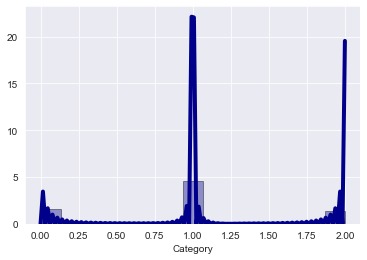

In [40]:
sns.distplot(data['Category'],hist=True,kde=True,
            bins='auto',color='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':4})

In [41]:
pd.crosstab(data['Category'],columns='count',normalize=True)

col_0,count
Category,
0,0.212227
1,0.602962
2,0.184811


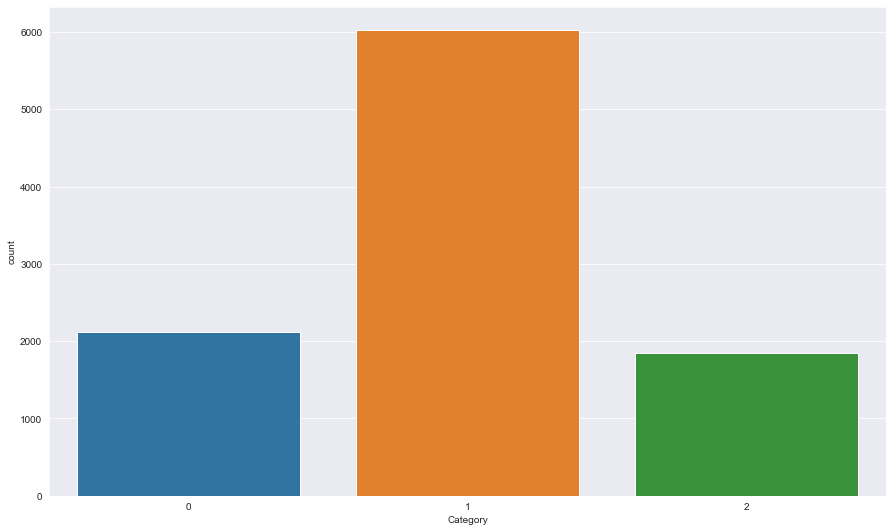

In [42]:
plt.figure(figsize=(15,9))
sns.countplot(data['Category'])

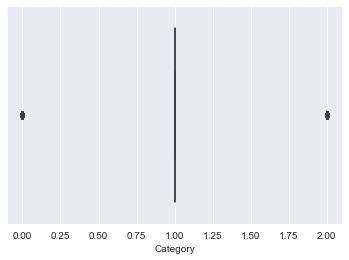

In [43]:
sns.boxplot(data['Category'])

In [44]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [45]:
data['Sub-Category']=le.fit_transform(data['Sub-Category'])
data['Sub-Category'].value_counts()

3     1523
12    1370
9      957
13     889
14     846
2      796
0      775
5      617
1      466
10     364
16     319
7      254
4      228
8      217
15     190
11     115
6       68
Name: Sub-Category, dtype: int64

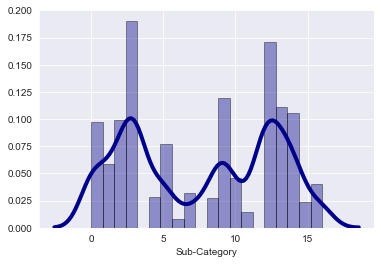

In [46]:
sns.distplot(data['Sub-Category'],hist=True,kde=True,
            bins='auto',color='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':4})

In [47]:
pd.crosstab(data['Sub-Category'],columns='count',normalize=True)

col_0,count
Sub-Category,
0,0.077547
1,0.046628
2,0.079648
3,0.152391
4,0.022814
5,0.061737
6,0.006804
7,0.025415
8,0.021713


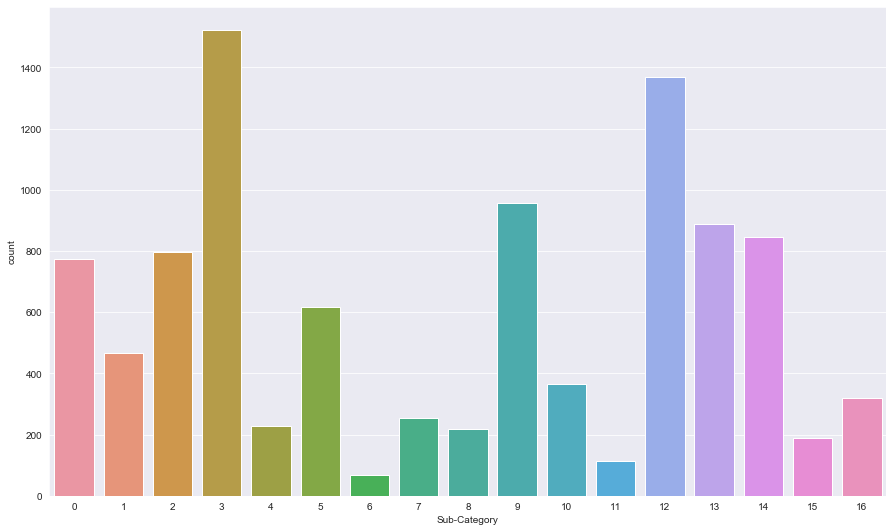

In [48]:
plt.figure(figsize=(15,9))
sns.countplot(data['Sub-Category'])

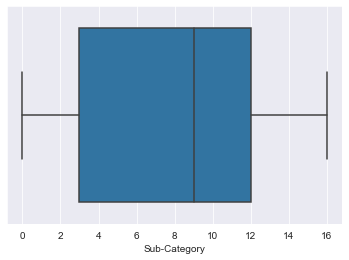

In [49]:
sns.boxplot(data['Sub-Category'])

In [50]:
data.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [51]:
cols=data.corr()['Profit'].nlargest(10)
cols.pop('Profit')
cols

Sales           0.479064
Category        0.091506
Quantity        0.066253
City            0.024217
Region          0.022216
Segment         0.013355
Ship Mode      -0.006619
State          -0.025315
Sub-Category   -0.029503
Name: Profit, dtype: float64

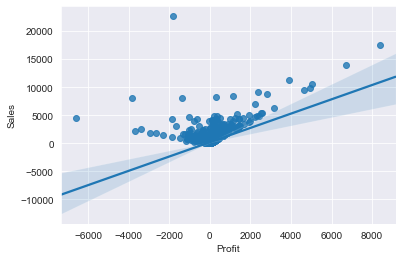

In [52]:
sns.regplot(x='Profit',y='Sales',fit_reg=True,scatter=True,data=data)

In [53]:
X=data.iloc[:,:-1].values
y=data.Profit

In [54]:
X_scaled=sc.fit_transform(X)
X=pd.DataFrame(X_scaled)

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=0)

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
rfc=RandomForestRegressor(n_estimators=100,n_jobs=1,min_samples_leaf=4,min_samples_split=10,max_depth=100,random_state=0,verbose=True)
rfc

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                      oob_score=False, random_state=0, verbose=True,
                      warm_start=False)

In [66]:
rfc.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                      oob_score=False, random_state=0, verbose=True,
                      warm_start=False)

In [71]:
from sklearn import metrics
rfc.score(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


0.7334524880051316

In [73]:
pred=rfc.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [74]:
metrics.r2_score(y_test,pred)

0.7037686541526427

In [87]:
pred=pd.DataFrame(pred)
y_test=pd.DataFrame(y_test.values)
res=pd.concat([pred,y_test],axis=1)
res.columns=['pred','original']
res

,pred,original
0,10.149700,11.6800
1,7.378076,9.7438
2,2.977986,2.6406
3,-7.136047,17.7450
4,6.668144,6.4428
...,...,...
2994,7.626704,7.5992
2995,1.092737,0.8856
2996,733.808317,843.1706
2997,16.681351,15.8256


In [90]:
from scipy import stats
z=np.abs(stats.zscore(data))
z

array([[0.2135135 , 0.86416091, 0.6177269 , ..., 0.8043034 , 0.75664349,
        0.05659251],
       [0.2135135 , 0.86416091, 0.6177269 , ..., 0.35486486, 0.75664349,
        0.81505408],
       [0.2135135 , 0.44716981, 0.10030313, ..., 0.8043034 , 0.75664349,
        0.09300169],
       ...,
       [0.694896  , 0.86416091, 1.2645066 , ..., 0.8043034 , 0.21215332,
        0.03954647],
       [0.694896  , 0.86416091, 1.2645066 , ..., 0.09457367, 0.75664349,
        0.06547279],
       [0.2135135 , 0.86416091, 1.70349361, ..., 0.8043034 , 0.75664349,
        0.18907752]])

In [94]:
data.shape

(9994, 12)

In [96]:
threshold=3
data_out=data[(z<3).all(axis=1)]
data_out.shape

(9436, 12)

In [97]:
X=data_out.drop('Profit',axis=1)
y=data_out.Profit

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [108]:
rfc2=RandomForestRegressor(n_estimators=100,max_depth=100,min_samples_split=10,min_samples_leaf=4,random_state=0)
rfc2.fit(X_train,y_train)
rfc2.score(X_train,y_train)

0.9152141252518029

In [109]:
pred2=rfc2.predict(X_test)

In [110]:
metrics.r2_score(y_test,pred2)

0.8312343284841408

In [111]:
pred2=pd.DataFrame(pred2)
y_test=pd.DataFrame(y_test.values)
res2=pd.concat([pred2,y_test],axis=1)
res2.columns=['pred','original']
res2

,pred,original
0,-68.993780,-137.5290
1,2.016821,1.9926
2,7.699450,10.3740
3,279.637555,473.6106
4,5.034943,6.2244
...,...,...
2826,0.464980,4.7790
2827,15.858285,15.9348
2828,4.043703,3.9600
2829,-23.463680,26.1156
